<a href="https://colab.research.google.com/github/cxz260/XzUtil/blob/main/Copy_of_TF_lstm_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This TensorFlow code assumes that you have a CSV file named IBM.csv to upload
Pay attention to:

1.  Sequerncy size 60, also test size(not good to mix thing up)
2.  LSTM model build
3.  model fit using batch_size

# New Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [ ]:
# Load data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('IBM.csv')
data = df.filter(['Close']).values
training_data_len = int(len(data) * 0.8)


Saving IBM.csv to IBM.csv


Epoch 1/100
5/5 [==============================] - 10s 96ms/step - loss: 0.2569
Epoch 2/100
5/5 [==============================] - 1s 111ms/step - loss: 0.0795
Epoch 3/100
5/5 [==============================] - 0s 97ms/step - loss: 0.0529
Epoch 4/100
5/5 [==============================] - 1s 168ms/step - loss: 0.0553
Epoch 5/100
5/5 [==============================] - 1s 219ms/step - loss: 0.0438
Epoch 6/100
5/5 [==============================] - 1s 141ms/step - loss: 0.0442
Epoch 7/100
5/5 [==============================] - 1s 146ms/step - loss: 0.0428
Epoch 8/100
5/5 [==============================] - 0s 96ms/step - loss: 0.0356
Epoch 9/100
5/5 [==============================] - 1s 107ms/step - loss: 0.0368
Epoch 10/100
5/5 [==============================] - 1s 101ms/step - loss: 0.0326
Epoch 11/100
5/5 [==============================] - 1s 100ms/step - loss: 0.0305
Epoch 12/100
5/5 [==============================] - 0s 95ms/step - loss: 0.0310
Epoch 13/100
5/5 [======================

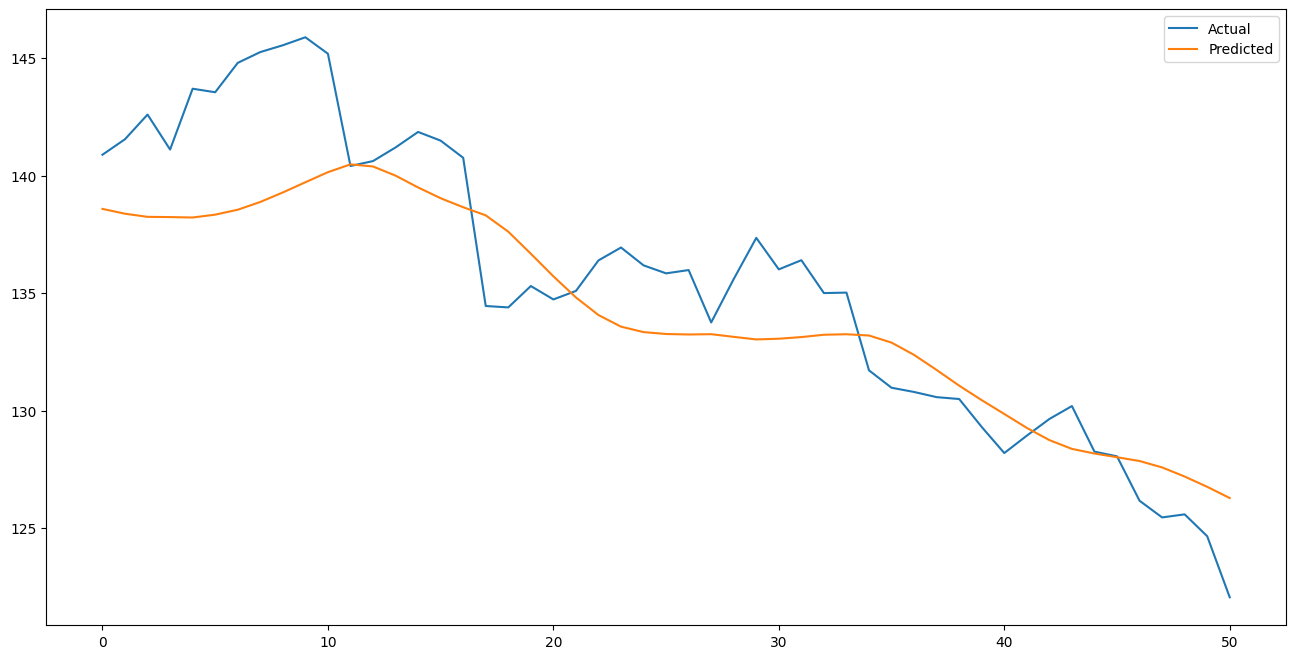

In [ ]:
# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training data
train_data = scaled_data[:training_data_len, :]
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) # sequence/sentence length=60
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100, batch_size=32)

# Create test data
test_data = scaled_data[training_data_len-60:, :]
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = scaler.inverse_transform(model.predict(x_test))

# Evaluate model
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print('Root Mean Squared Error:', rmse)

# Plot predictions
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()




